**รหัสผู้เข้าอบรม: A29**  
**ชื่อ นามสกุล: ธนัทเมศร์ ธนารัตน์ธนันท์**

#Exercise Day 2

#2.Data Cleansing, Integration, Transformation (4 points)

ไฟล์ hotel.csv บันทึกข้อมูลที่ใช้ในการจองโรงแรม 2 โรงแรม (Hotel Booking Records) ที่จะมีการเข้าพักในวันที่ 4 มกราคม 2564 ดังนี้

- ชื่อของโรงแรม (hotel) ได้แก่ City hotel และ Resort hotel
- การจองนั้นถูกยกเลิกหรือไม่ (is_canceled)
- ระยะเวลาที่จองล่วงหน้าก่อนการเข้าพักจริง (lead_time)
- จำนวนคืนที่จะเข้าพักในช่วงคืนวันจันทร์ถึงวันศุกร์ (stays_in_week_nights)
- จำนวนของผู้ใหญ่ที่เข้าพัก (adults)
- จำนวนของเด็กเล็กที่เข้าพัก (children)
- จำนวนของเด็กทารกที่เข้าพัก (babies)
- ชนิดของอาหารที่ให้บริการ (meal) เช่น SC หมายถึง ไม่ให้บริการ
- ชนิดของเงินมัดจำ (deposit_type)
- รหัสประจำตัวของบริษัทท่องเที่ยวที่ทำการจอง (agent)
- รหัสประจำตัวของบริษัทหรือองค์กรที่ทำการจอง หรือจะรับผิดชอบค่าใช้จ่ายในการพัก (company)


In [1]:
!wget --no-check-certificate -O hotel.csv 'https://docs.google.com/uc?export=download&id=1tpiEhbEQgSAQQU-SJ_I5XymGYkfeVptr'

--2023-11-19 09:53:56--  https://docs.google.com/uc?export=download&id=1tpiEhbEQgSAQQU-SJ_I5XymGYkfeVptr
Resolving docs.google.com (docs.google.com)... 173.194.174.138, 173.194.174.101, 173.194.174.100, ...
Connecting to docs.google.com (docs.google.com)|173.194.174.138|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-0o-8s-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/oa4jfcqmpmel9tv2vq9s8at1harju5li/1700387625000/02898390244786671904/*/1tpiEhbEQgSAQQU-SJ_I5XymGYkfeVptr?e=download&uuid=3a5795b3-889f-43ac-a51b-66d76ede37c0 [following]
--2023-11-19 09:53:57--  https://doc-0o-8s-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/oa4jfcqmpmel9tv2vq9s8at1harju5li/1700387625000/02898390244786671904/*/1tpiEhbEQgSAQQU-SJ_I5XymGYkfeVptr?e=download&uuid=3a5795b3-889f-43ac-a51b-66d76ede37c0
Resolving doc-0o-8s-docs.googleusercontent.com (doc-0o-8s-docs.googleusercontent.com)... 74.125.203.132, 2404:6

##Extract data


*   read csv file
*   extract data into a dataframe df
*   show the first five rows of the data frame

In [2]:
# import lib
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# load data
hotel_df = pd.read_csv('hotel.csv')
hotel_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 10 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   hotel         119390 non-null  object 
 1   is_canceled   119390 non-null  int64  
 2   lead_time     119390 non-null  int64  
 3   adults        119390 non-null  int64  
 4   children      119386 non-null  float64
 5   babies        119390 non-null  int64  
 6   meal          119389 non-null  object 
 7   deposit_type  119390 non-null  object 
 8   agent         103050 non-null  float64
 9   company       6797 non-null    float64
dtypes: float64(3), int64(4), object(3)
memory usage: 9.1+ MB


In [3]:
print(hotel_df.head()) # get first five rows
print(hotel_df.shape) # shape

          hotel  is_canceled  lead_time  adults  children  babies meal  \
0  Resort Hotel            0        342       2       0.0       0   BB   
1  Resort Hotel            0        737       2       0.0       0   BB   
2  Resort Hotel            0          7       1       0.0       0   BB   
3  Resort Hotel            0         13       1       0.0       0   BB   
4  Resort Hotel            0         14       2       0.0       0   BB   

  deposit_type  agent  company  
0   No Deposit    NaN      NaN  
1   No Deposit    NaN      NaN  
2   No Deposit    NaN      NaN  
3   No Deposit  304.0      NaN  
4   No Deposit  240.0      NaN  
(119390, 10)


จากไฟล์ด้งกล่าวที่ให้ จงเขียนคำสั่งเพื่อ

2.1 ตรวจสอบว่า column ใดมีค่า NaN หรือ NULL เกิน 50% ให้ลบ column นั้นออกจาก dataframe กำหนดให้ทำเพียง 1 column
##2.1 Answer

In [4]:
find_na_df = hotel_df.isna().sum() * 100 / len(hotel_df) # convert to percentage
over_50_per_df = find_na_df[find_na_df > 50] # filter  nan min 50 percentage
list(over_50_per_df.keys())[:1]

['company']

In [5]:
find_na_df = hotel_df.isna().sum() * 100 / len(hotel_df) # convert to percentage
over_50_per_df = find_na_df[find_na_df > 50] # filter  nan min 50 percentage
print(over_50_per_df) # print df of filter
print(list(over_50_per_df.keys())) # print columns

# drop column only first column
hotel_df.drop(columns=list(over_50_per_df.keys())[:1],inplace=True)

print(hotel_df.shape)
print(hotel_df.head())

company    94.306893
dtype: float64
['company']
(119390, 9)
          hotel  is_canceled  lead_time  adults  children  babies meal  \
0  Resort Hotel            0        342       2       0.0       0   BB   
1  Resort Hotel            0        737       2       0.0       0   BB   
2  Resort Hotel            0          7       1       0.0       0   BB   
3  Resort Hotel            0         13       1       0.0       0   BB   
4  Resort Hotel            0         14       2       0.0       0   BB   

  deposit_type  agent  
0   No Deposit    NaN  
1   No Deposit    NaN  
2   No Deposit    NaN  
3   No Deposit  304.0  
4   No Deposit  240.0  


2.2 ตรวจสอบว่าใน column agent มีค่าที่บันทึกในแถวหรือ record ใดที่หายไป (missing) และ/หรือมีค่าที่ผิดปรกติหรือไม่เข้าพวก (mismatched) กี่ค่า กำหนดให้แทนค่าที่หายและ/หรือค่าที่ผิดปรกติหรือไม่เข้าพวก ด้วย -1
##2.2 Answer

In [6]:
# sum missing
hotel_df['agent'].isna().sum()

16340

In [7]:
# info
hotel_df['agent'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 119390 entries, 0 to 119389
Series name: agent
Non-Null Count   Dtype  
--------------   -----  
103050 non-null  float64
dtypes: float64(1)
memory usage: 932.9 KB


In [8]:
# stats
hotel_df['agent'].describe()

count    103050.000000
mean         86.693382
std         110.774548
min           1.000000
25%           9.000000
50%          14.000000
75%         229.000000
max         535.000000
Name: agent, dtype: float64

In [9]:
# fillna
print('Before : ' + str(hotel_df['agent'].isna().sum()))
hotel_df['agent'].fillna(-1,inplace=True)
print('After : ' + str(hotel_df['agent'].isna().sum()))

Before : 16340
After : 0


In [10]:
hotel_df['agent'].head()

0     -1.0
1     -1.0
2     -1.0
3    304.0
4    240.0
Name: agent, dtype: float64

2.3 สร้าง column ขึ้นมาใหม่ที่แสดงจำนวนคนที่จะเข้าพักทั้งหมดในแต่ละการจอง (ผลรวมของจำนวนผู้ใหญ่ เด็กเล็ก และเด็กทารก)
##2.3 Answer

In [11]:
# จำนวนของผู้ใหญ่ที่เข้าพัก (adults)
# จำนวนของเด็กเล็กที่เข้าพัก (children)
# จำนวนของเด็กทารกที่เข้าพัก (babies)
hotel_df['check_in_total'] = hotel_df['adults'] + hotel_df['children'] + hotel_df['babies']
print(hotel_df.head())
print()
print('Total sum(check_in_total): ' + str(hotel_df['check_in_total'].sum()))

          hotel  is_canceled  lead_time  adults  children  babies meal  \
0  Resort Hotel            0        342       2       0.0       0   BB   
1  Resort Hotel            0        737       2       0.0       0   BB   
2  Resort Hotel            0          7       1       0.0       0   BB   
3  Resort Hotel            0         13       1       0.0       0   BB   
4  Resort Hotel            0         14       2       0.0       0   BB   

  deposit_type  agent  check_in_total  
0   No Deposit   -1.0             2.0  
1   No Deposit   -1.0             2.0  
2   No Deposit   -1.0             1.0  
3   No Deposit  304.0             1.0  
4   No Deposit  240.0             2.0  

Total sum(check_in_total): 234958.0


2.4 แปลงชนิดของข้อมูลใน column meal เป็นตัวเลข
##2.4 Answer

In [12]:
hotel_df_test = hotel_df.copy(deep=True)

In [13]:
# solution1 with dictionary and replace
values = list(hotel_df.meal.value_counts().keys())
dict = {}
for index in range(len(values)):
  dict[values[index]] = index + 1

print('Generate dict : ' + str(dict))
print()
print('Before replace')
print(hotel_df.head())
hotel_df.meal.replace(dict,inplace=True)
print('After replace')
print(hotel_df.head())

Generate dict : {'BB': 1, 'HB': 2, 'SC': 3, 'Undefined': 4, 'FB': 5, 'BBB': 6, 'FBF': 7, 'HB3': 8}

Before replace
          hotel  is_canceled  lead_time  adults  children  babies meal  \
0  Resort Hotel            0        342       2       0.0       0   BB   
1  Resort Hotel            0        737       2       0.0       0   BB   
2  Resort Hotel            0          7       1       0.0       0   BB   
3  Resort Hotel            0         13       1       0.0       0   BB   
4  Resort Hotel            0         14       2       0.0       0   BB   

  deposit_type  agent  check_in_total  
0   No Deposit   -1.0             2.0  
1   No Deposit   -1.0             2.0  
2   No Deposit   -1.0             1.0  
3   No Deposit  304.0             1.0  
4   No Deposit  240.0             2.0  
After replace
          hotel  is_canceled  lead_time  adults  children  babies  meal  \
0  Resort Hotel            0        342       2       0.0       0   1.0   
1  Resort Hotel            0        

In [14]:
# solution2 with sklearn fit label encoder
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

print('Before fit')
print(hotel_df_test.head())
hotel_df_test.meal = label_encoder.fit_transform(hotel_df_test.meal)
print('After fit')
print(hotel_df_test.head())

Before fit
          hotel  is_canceled  lead_time  adults  children  babies meal  \
0  Resort Hotel            0        342       2       0.0       0   BB   
1  Resort Hotel            0        737       2       0.0       0   BB   
2  Resort Hotel            0          7       1       0.0       0   BB   
3  Resort Hotel            0         13       1       0.0       0   BB   
4  Resort Hotel            0         14       2       0.0       0   BB   

  deposit_type  agent  check_in_total  
0   No Deposit   -1.0             2.0  
1   No Deposit   -1.0             2.0  
2   No Deposit   -1.0             1.0  
3   No Deposit  304.0             1.0  
4   No Deposit  240.0             2.0  
After fit
          hotel  is_canceled  lead_time  adults  children  babies  meal  \
0  Resort Hotel            0        342       2       0.0       0     0   
1  Resort Hotel            0        737       2       0.0       0     0   
2  Resort Hotel            0          7       1       0.0       0    

In [15]:
hotel_df_test['meal'].value_counts() # extract value of meal

0    92308
4    14462
6    10650
7     1169
2      797
1        1
3        1
5        1
8        1
Name: meal, dtype: int64

#3.Data Analysis, Visualization (4 points)

3.1 หากค่าใน column leadtime  แถวใดเป็น 0 ให้แทนด้วยค่าเฉลี่ย (mean) ของกลุ่มการจองใน column ดังกล่าว

##3.1 Answer

In [16]:
# see mean value
hotel_df['lead_time'].mean()

104.01141636652986

In [17]:
# set new values
hotel_df.loc[hotel_df['lead_time'] == 0, 'lead_time'] = hotel_df['lead_time'].mean()

In [18]:
# see after
hotel_df['lead_time'].value_counts()

104.011416    6345
1.000000      3460
2.000000      2069
3.000000      1816
4.000000      1715
              ... 
400.000000       1
370.000000       1
532.000000       1
371.000000       1
463.000000       1
Name: lead_time, Length: 479, dtype: int64

3.2 ใช้ boxplot เพื่อแสดงว่า column ใดมีค่า outlier สูงหรือต่ำ โดยระบุชื่อ column, outliers ที่สูงและ/หรือต่ำเกินไป และค่าที่ผิดปรกติหรือไม่เข้าพวก (mismatched เช่น type mismatched) ของ column นั้น เลือกเพียง 1 column

Hint: [Box plot visualization with Pandas and Seaborn](https://www.geeksforgeeks.org/box-plot-visualization-with-pandas-and-seaborn/)

##3.2 Answer

3.3 แสดงวิธีตรวจสอบว่า column ใดเป็นค่า categorical Hint: [select_dtypes](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.select_dtypes.html)

##3.3 Answer

array([[<Axes: title={'center': 'is_canceled'}>,
        <Axes: title={'center': 'lead_time'}>,
        <Axes: title={'center': 'adults'}>],
       [<Axes: title={'center': 'children'}>,
        <Axes: title={'center': 'babies'}>,
        <Axes: title={'center': 'meal'}>],
       [<Axes: title={'center': 'agent'}>,
        <Axes: title={'center': 'check_in_total'}>, <Axes: >]],
      dtype=object)

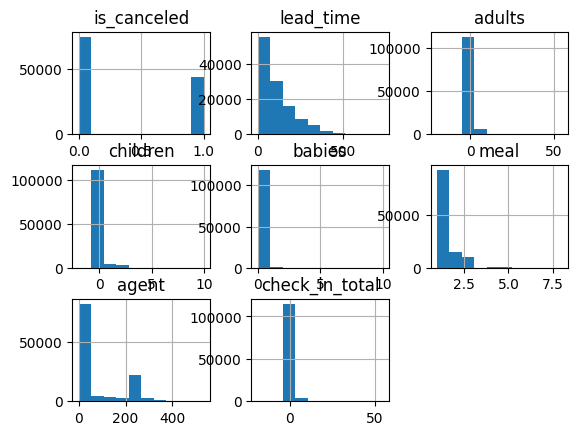

In [19]:
hotel_df.hist()

In [20]:
hotel_df_categorical = hotel_df.select_dtypes(exclude=np.number)
print(hotel_df_categorical)

               hotel deposit_type
0       Resort Hotel   No Deposit
1       Resort Hotel   No Deposit
2       Resort Hotel   No Deposit
3       Resort Hotel   No Deposit
4       Resort Hotel   No Deposit
...              ...          ...
119385    City Hotel   No Deposit
119386    City Hotel   No Deposit
119387    City Hotel   No Deposit
119388    City Hotel   No Deposit
119389    City Hotel   No Deposit

[119390 rows x 2 columns]


3.4 เลือก column ที่มีข้อมูลเป็นแบบ categorical เพียง 1 column แล้ว plot graph เพื่อแสดงรายละเอียดของ column นั้น โดยเลือกใช้ data visualization function ใดก็ได้

##3.4 Answer

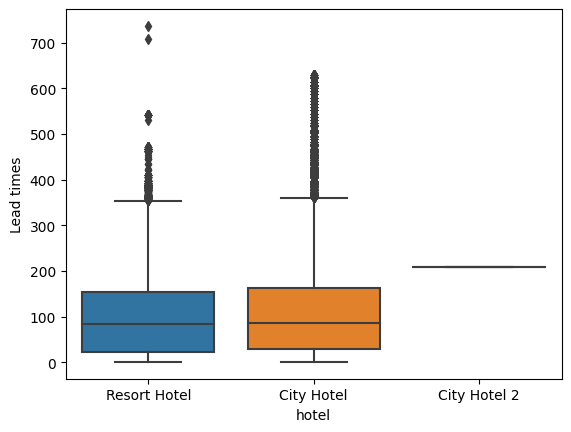

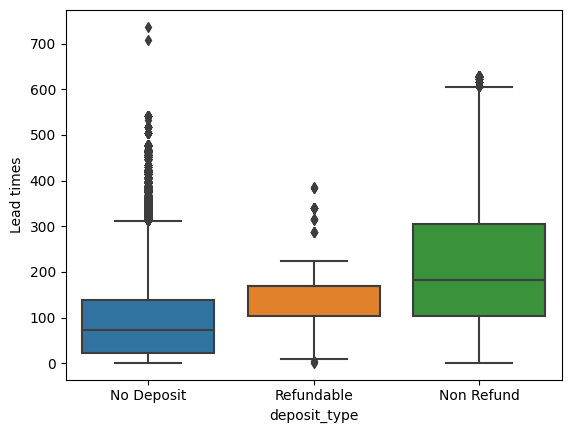

In [21]:
# ชื่อของโรงแรม (hotel) ได้แก่ City hotel และ Resort hotel
# การจองนั้นถูกยกเลิกหรือไม่ (is_canceled)
# ระยะเวลาที่จองล่วงหน้าก่อนการเข้าพักจริง (lead_time)
# จำนวนคืนที่จะเข้าพักในช่วงคืนวันจันทร์ถึงวันศุกร์ (stays_in_week_nights)
# จำนวนของผู้ใหญ่ที่เข้าพัก (adults)
# จำนวนของเด็กเล็กที่เข้าพัก (children)
# จำนวนของเด็กทารกที่เข้าพัก (babies)
# ชนิดของอาหารที่ให้บริการ (meal) เช่น SC หมายถึง ไม่ให้บริการ
# ชนิดของเงินมัดจำ (deposit_type)

cat_cols = [
    'hotel',
    'deposit_type']


# box plot ดูการกระจายตัวของข้อมูล
for col in cat_cols:
  sns.boxplot(x=col, y='lead_time', data=hotel_df)
  plt.xlabel(col)
  plt.ylabel('Lead times')
  plt.show()